In [1]:
import time
import os
import logging

from copy import deepcopy
#import dill
import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

import numpy as np
import itertools
import pickle
import pandas as pd

# from IPython.display import display
# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets
#from pypalettes import get_hex

# torch packages
import torch
# import torch.optim as optim
# import torch.nn as nn

# from torch.nn.functional import mse_loss, l1_loss
# from torch.utils.data import DataLoader
# from torchvision import datasets,transforms
# from torchvision.transforms import v2
# #from torchvision.utils import make_grid
# from torchsummary import summary

#import torch.nn.functional as F

FILENAME = 'STATS_Autoenc_SIC_'

if '../src/modules/' not in sys.path:
    sys.path.append('../src/modules/')

# from plot_jupyter import contour_compare, contour_data
# from data_wrangle import get_days_before, get_test_set, window_mean, get_days_after
# from autoenc_highres import Encoder_sharp, Decoder_sharp, Encoder_sharp_1024, Decoder_sharp_1024
# from sic_data_functions import get_ice_data, thin_data, iiee_calc, normalise_image, test_data_stats, thousands,millions, multiple_dfs_to_excel

# batched_iiee = torch.func.vmap(iiee_calc)
# batched_min = torch.func.vmap(torch.min)
# batched_max = torch.func.vmap(torch.max)

# formatter = FuncFormatter(thousands)
# formatter_mil = FuncFormatter(millions)

In [2]:
# #seed for repeatable results
# torch.manual_seed(0)
# gen1 = torch.Generator().manual_seed(0)

In [3]:
"""Directories"""

pkl_dir = r'../outputs/pkl/'
stats_dir = r'../outputs/stats/'
import_dir = r'../inputs/'

In [4]:
year = 32 # year within data set
day = 0 # day within year as the starting point 
window = 1 # window-averaging
num_year_data = 32 # number of years worth of data
T_train = 365 * num_year_data  # how many days worth of data needed
batchSize = 210  #215 #batch size for dataloader will vary PC to PC
dim_latent = 64 #2,4,8,16,24,32,
T_test = 365*2


# X0_ = get_days_before(sic_data, year, day, T_train+window-1) # get days from DATA
# X1_ = get_days_after(sic_data, year, day,T_test)

# if window > 1:
#     X0_ = window_mean(X0_, window = window, t = None) # compute window mean, 
#     X1_ = get_test_set(sic_data, year, day, window, T_test)
# X0_.shape, X1_.shape

# X0_ = get_days_before(sic_data, year, day, T_train+window-1)
# X1_ = get_days_after(sic_data, year, day,  365*2)

In [5]:
"""import latent space and plot"""

'import latent space and plot'

In [6]:
with open(import_dir + 'latent/dldmd_latent.pkl', "rb") as in_data:
  dldmd_latent = pickle.load(in_data)

with open(import_dir + 'latent/lstm.pkl', "rb") as in_data:
  lstm_latent = pickle.load(in_data)

#lstm_latent = torch.load(import_dir + 'latent/lstm.pkl' , map_location=torch.device('cpu'))

with open(import_dir + 'latent/latent_avg.pkl', "rb") as in_data:
  latent_avg = pickle.load(in_data)

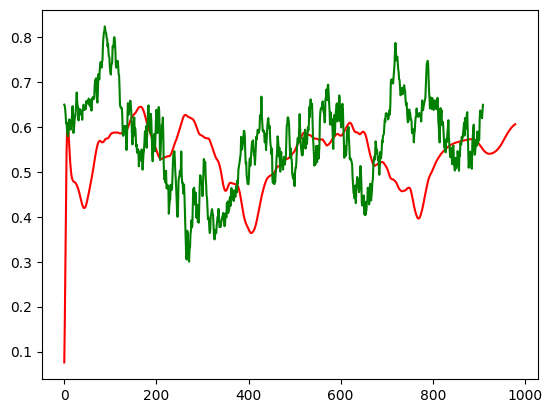

In [7]:
# plt.plot(pred_latent[:,latent_idx], color = 'r')
# plt.plot(true_latent[:,latent_idx], color = 'g')
# plt.show()

# dldmd_1[3][:,0].shape

latent_idx = 0 

pred_latent_lstm = lstm_latent[0][3]#.detach().cpu().numpy()[-910:]
true_latent_lstm = np.concatenate((lstm_latent[0][1], lstm_latent[0][2][:180]))[-910:]

plt.plot(pred_latent_lstm[:,latent_idx], color = 'r')
plt.plot(true_latent_lstm[:,latent_idx], color = 'g')
plt.show()

In [8]:
latent_idx = 10

dldmd_1 = dldmd_latent[0]
pred_latent = np.concatenate((dldmd_1[4],dldmd_1[5][:180]))
true_latent = np.concatenate((dldmd_1[2],dldmd_1[3][:180]))

#pred_latent_chk = dldmd_1[1][:910]
#plt.plot(pred_latent_chk[:,latent_idx], color = 'orange')




c:\ProgramData\miniconda3\envs\autoenc1\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\ProgramData\miniconda3\envs\autoenc1\Lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
c:\ProgramData\miniconda3\envs\autoenc1\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\ProgramData\miniconda3\envs\autoenc1\Lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
c:\ProgramData\miniconda3\envs\autoenc1\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\ProgramData\miniconda3\env

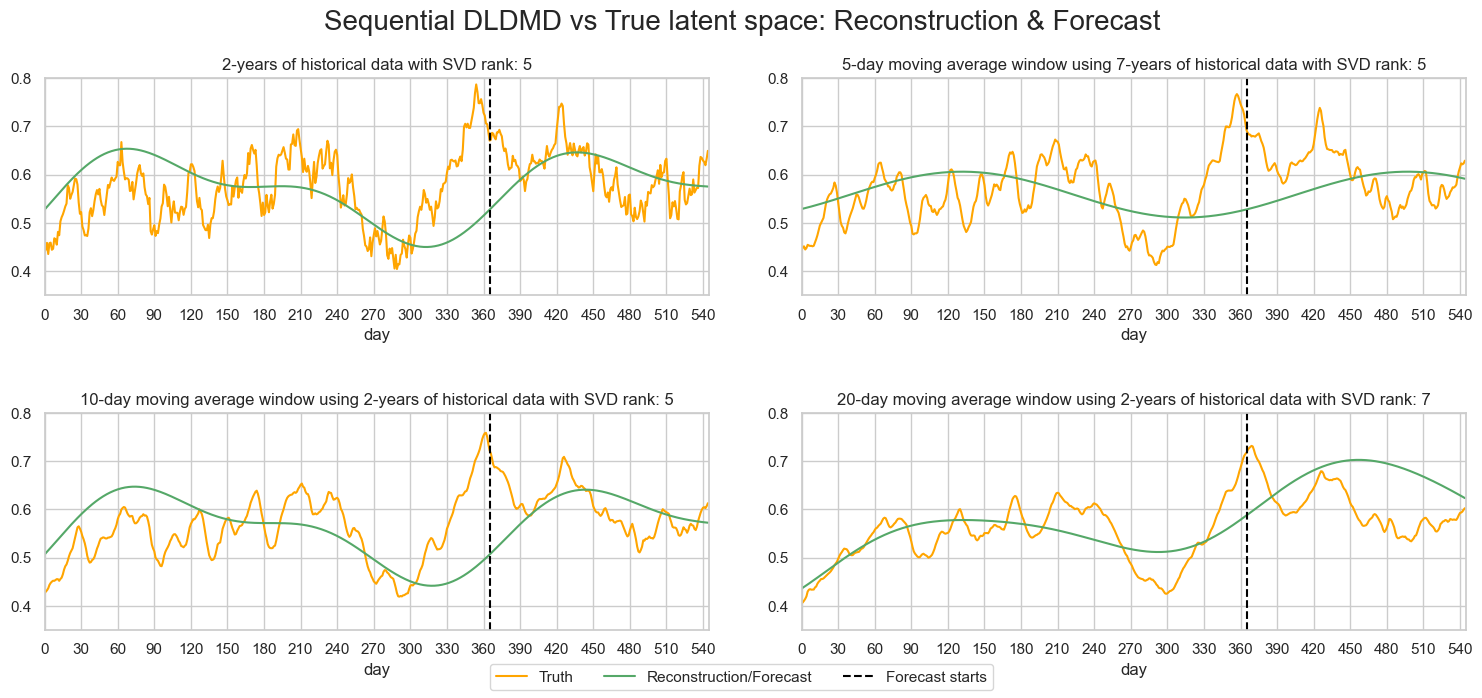

In [9]:
import seaborn as sns

sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

latent_idx = 0

run_fulltrend = True

if run_fulltrend:
    # xlim_min = 910-365
    # xlim_max = 915
    # xlim_max2 = 910
    # data_limit = -365-180

    xlim_min = 0
    xlim_max = 365+180
    xlim_max2 = 365+190
    data_limit = -365-180
    step = 30
    ymin = 0.35
    ymax = 0.8
    legend_label = 'Reconstruction/Forecast'

else:
    xlim_min = 0
    xlim_max = 180
    xlim_max2 = 190
    data_limit = -180
    step = 20
    ymin = 0.4
    ymax = 0.8
    legend_label = 'Forecast'
# title_1 = '{}-years of historical data with SVD rank: {}'.format(n,o)
# title_1 = "{}-day moving average window using {}-years of historical data with SVD rank:{}".format(m,n,o)


dldmd_1 = dldmd_latent[0]
pred_1 = np.concatenate((dldmd_1[4],dldmd_1[5][:180]))
true_1 = np.concatenate((dldmd_1[2],dldmd_1[3][:180]))

sns.lineplot(true_1[data_limit:,latent_idx],  ax =axs[0][0], color = 'orange', label = "Truth")
ax1 = sns.lineplot(pred_1[data_limit:,latent_idx],  ax =axs[0][0] ,color = 'g', label = legend_label )
ax1.set(xlabel='Forecast day')
ax1.set_xlim([xlim_min ,xlim_max])
ax1.set_ylim([ymin ,ymax])
ax1.set_xticks(np.arange(xlim_min, xlim_max2, step))
ax1.title.set_text('{}-years of historical data with SVD rank: {}'.format(dldmd_1[0][1],dldmd_1[0][2]))
ax1.grid(True)
################################

dldmd_2 = dldmd_latent[1]
pred_2 = np.concatenate((dldmd_2[4],dldmd_2[5][:180]))
true_2 = np.concatenate((dldmd_2[2],dldmd_2[3][:180]))

sns.lineplot(true_2[data_limit:,latent_idx],  ax =axs[0][1], color = 'orange' )
ax2 = sns.lineplot(pred_2[data_limit:,latent_idx],  ax =axs[0][1],color = 'g'  )
ax2.set(xlabel='Forecast day')
ax2.set_xlim([xlim_min ,xlim_max])
ax2.set_ylim([ymin ,ymax])
ax2.set_xticks(np.arange(xlim_min, xlim_max2, step))
ax2.title.set_text("{}-day moving average window using {}-years of historical data with SVD rank: {}".format(dldmd_2[0][0],dldmd_2[0][1],dldmd_2[0][2]))
ax2.grid(True)
##################################

dldmd_3 = dldmd_latent[2]
pred_3 = np.concatenate((dldmd_3[4],dldmd_3[5][:180]))
true_3 = np.concatenate((dldmd_3[2],dldmd_3[3][:180]))

sns.lineplot(true_3[data_limit:,latent_idx],  ax =axs[1][0], color = 'orange' )
ax3 = sns.lineplot(pred_3[data_limit:,latent_idx],  ax =axs[1][0] ,color = 'g' )
ax3.set(xlabel='Forecast day')
ax3.set_xlim([xlim_min ,xlim_max])
ax3.set_ylim([ymin ,ymax])
ax3.set_xticks(np.arange(xlim_min, xlim_max2, step))
ax3.title.set_text("{}-day moving average window using {}-years of historical data with SVD rank: {}".format(dldmd_3[0][0],dldmd_3[0][1],dldmd_3[0][2]))
ax3.grid(True)
##################################

dldmd_4 = dldmd_latent[3]
pred_4 = np.concatenate((dldmd_4[4],dldmd_4[5][:180]))
true_4 = np.concatenate((dldmd_4[2],dldmd_4[3][:180]))

sns.lineplot(true_4[data_limit:,latent_idx],  ax =axs[1][1], color = 'orange' )
ax4 = sns.lineplot(pred_4[data_limit:,latent_idx],  ax =axs[1][1],color = 'g' )
ax4.grid(False)
ax4.set(xlabel='Forecast day')
ax4.set_xlim([xlim_min ,xlim_max])
ax4.set_ylim([ymin ,ymax])
ax4.set_xticks(np.arange(xlim_min, xlim_max2, step))
ax4.title.set_text("{}-day moving average window using {}-years of historical data with SVD rank: {}".format(dldmd_4[0][0],dldmd_4[0][1],dldmd_4[0][2]))
ax4.grid(True)
##################################

if run_fulltrend:
    ax1.axvline(x = 365, color ='black', linestyle = '--', label = "Forecast starts")
    ax2.axvline(x = 365, color ='black', linestyle = '--')
    ax3.axvline(x = 365, color ='black', linestyle = '--')
    ax4.axvline(x = 365, color ='black', linestyle = '--')

    ax1.set(xlabel='day')
    ax2.set(xlabel='day')
    ax3.set(xlabel='day')
    ax4.set(xlabel='day')

fig.subplots_adjust(hspace=-1)


if run_fulltrend:
    fig.suptitle("Sequential DLDMD vs True latent space: Reconstruction & Forecast", size = 20)
else:
    fig.suptitle("Sequential DLDMD vs True latent space: Forecast", size = 20)


ax1.get_legend().remove()
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]

lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

fig.legend(lines, labels, loc="lower center", ncol=3)

plt.tight_layout(h_pad=3, w_pad = 3)

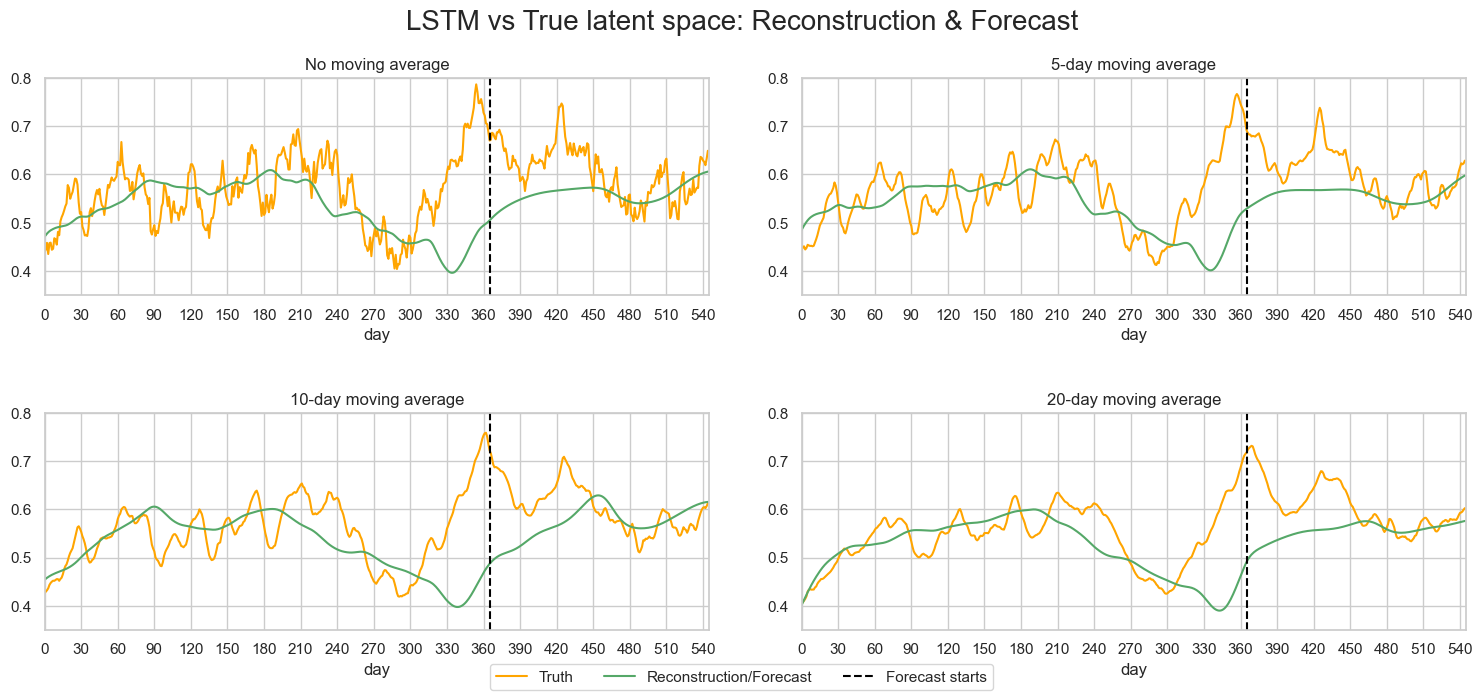

In [10]:
import seaborn as sns

sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

latent_idx = 0

run_fulltrend = True

if run_fulltrend:
    # xlim_min = 910-365
    # xlim_max = 915
    # xlim_max2 = 910
    # data_limit = -365-180

    xlim_min = 0
    xlim_max = 365+180
    xlim_max2 = 365+190
    data_limit = -365-180
    step = 30
    ymin = 0.35
    ymax = 0.8
    legend_label = 'Reconstruction/Forecast'
else:
    xlim_min = 0
    xlim_max = 180
    xlim_max2 = 190
    data_limit = -180
    step = 20
    ymin = 0.4
    ymax = 0.8
    legend_label = 'Forecast'

lstm_1 = lstm_latent[0]
pred_1 = lstm_1[3]
true_1 = np.concatenate((lstm_1[1],lstm_1[2][:180]))

sns.lineplot(true_1[data_limit:,latent_idx],  ax =axs[0][0], color = 'orange', label = 'Truth')
ax1 = sns.lineplot(pred_1[data_limit:,latent_idx],  ax =axs[0][0], color = 'g', label = legend_label )
ax1.set(xlabel='Forecast day')
ax1.set_xlim([xlim_min ,xlim_max])
ax1.set_ylim([ymin ,ymax])
ax1.set_xticks(np.arange(xlim_min, xlim_max2, step))
ax1.title.set_text("No moving average")
ax1.grid(True)

################################

lstm_2 = lstm_latent[1]
pred_2 = lstm_2[3]
true_2 = np.concatenate((lstm_2[1],lstm_2[2][:180]))

sns.lineplot(true_2[data_limit:,latent_idx],  ax =axs[0][1], color = 'orange' )
ax2 = sns.lineplot(pred_2[data_limit:,latent_idx],  ax =axs[0][1], color = 'g'  )
ax2.set(xlabel='Forecast day')
ax2.set_xlim([xlim_min ,xlim_max])
ax2.set_ylim([ymin ,ymax])
ax2.set_xticks(np.arange(xlim_min, xlim_max2, step))
ax2.title.set_text("{}-day moving average".format(lstm_2[0][1]))
ax2.grid(True)
##################################

lstm_3 = lstm_latent[2]
pred_3 = lstm_3[3]
true_3 = np.concatenate((lstm_3[1],lstm_3[2][:180]))

sns.lineplot(true_3[data_limit:,latent_idx],  ax =axs[1][0], color = 'orange'  )
ax3 = sns.lineplot(pred_3[data_limit:,latent_idx],  ax =axs[1][0], color = 'g'  )
ax3.set(xlabel='Forecast day')
ax3.set_xlim([xlim_min ,xlim_max])
ax3.set_ylim([ymin ,ymax])
ax3.set_xticks(np.arange(xlim_min, xlim_max2, step))
ax3.title.set_text("{}-day moving average".format(lstm_3[0][1]))
ax3.grid(True)
##################################

lstm_4 = lstm_latent[3]
pred_4 = lstm_4[3]
true_4 = np.concatenate((lstm_4[1],lstm_4[2][:180]))

sns.lineplot(true_4[data_limit:,latent_idx],  ax =axs[1][1], color = 'orange' )
ax4 = sns.lineplot(pred_4[data_limit:,latent_idx],  ax =axs[1][1], color = 'g' )
ax4.grid(False)
ax4.set(xlabel='Forecast day')
ax4.set_xlim([xlim_min ,xlim_max])
ax4.set_ylim([ymin ,ymax])
ax4.set_xticks(np.arange(xlim_min, xlim_max2, step))
ax4.title.set_text("{}-day moving average".format(lstm_4[0][1]))
ax4.grid(True)
##################################

if run_fulltrend:
    ax1.axvline(x = 365, color ='black', linestyle = '--', label = "Forecast starts")
    ax2.axvline(x = 365, color ='black', linestyle = '--')
    ax3.axvline(x = 365, color ='black', linestyle = '--')
    ax4.axvline(x = 365, color ='black', linestyle = '--')

    ax1.set(xlabel='day')
    ax2.set(xlabel='day')
    ax3.set(xlabel='day')
    ax4.set(xlabel='day')

fig.subplots_adjust(hspace=-1)
if run_fulltrend:
    fig.suptitle("LSTM vs True latent space: Reconstruction & Forecast", size = 20)
else:
    fig.suptitle("LSTM vs True latent space: Forecast", size = 20)

ax1.get_legend().remove()
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]

lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

fig.legend(lines, labels, loc="lower center", ncol=3)


plt.tight_layout(h_pad=3, w_pad = 3)

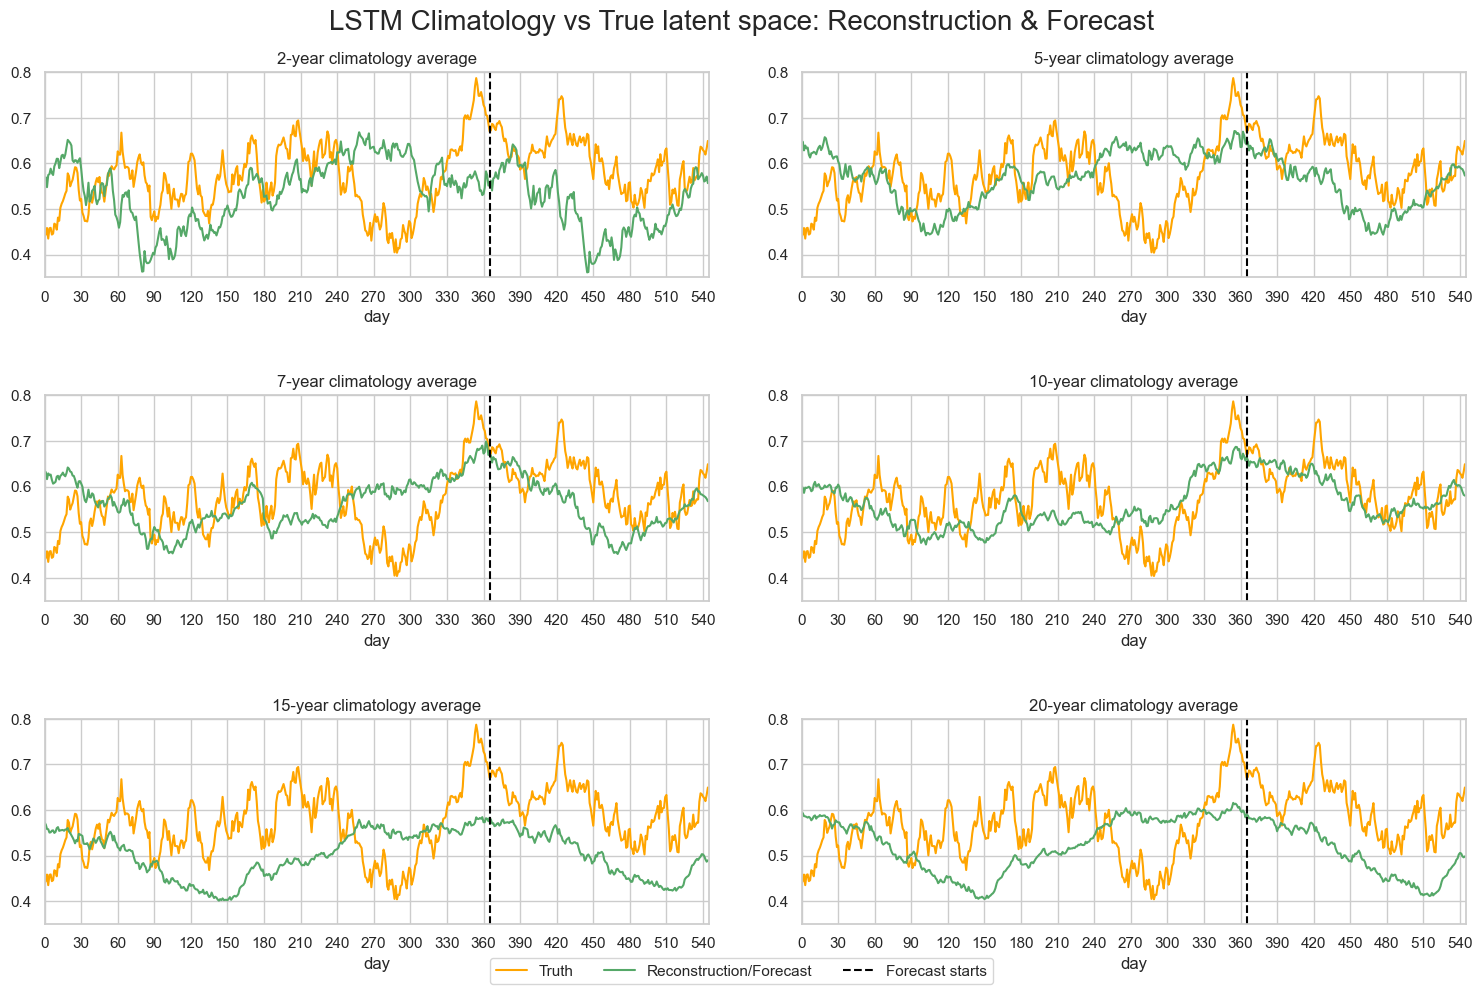

In [11]:
import seaborn as sns

sns.set(style="whitegrid")
fig, axs = plt.subplots(3,2, figsize=(15, 10))

latent_idx = 0

run_fulltrend = True

if run_fulltrend:
    xlim_min = 0
    xlim_max = 365+180
    xlim_max2 = 365+190
    data_limit = -365-180
    step = 30
    ymin = 0.35
    ymax = 0.8
    legend_label = 'Reconstruction/Forecast'
else:
    xlim_min = 0
    xlim_max = 180
    xlim_max2 = 190
    data_limit = -180
    step = 20
    ymin = 0.35
    ymax = 0.8
    legend_label = 'Forecast'

# title_1 = '{}-years of historical data with SVD rank: {}'.format(n,o)
# title_1 = "{}-day moving average window using {}-years of historical data with SVD rank:{}".format(m,n,o)
#"No moving average".format(latent_avg[0][1])

lstm_1 = latent_avg[0]
pred_1 = lstm_1[3]
true_1 = np.concatenate((lstm_1[1],lstm_1[2][:180]))

sns.lineplot(true_1[data_limit:,latent_idx],  ax =axs[0][0],color = 'orange', label = 'Truth') 
ax1 = sns.lineplot(pred_1[data_limit:,latent_idx],  ax =axs[0][0],color = 'g', label =legend_label)
ax1.set(xlabel='Forecast day')
ax1.set_xlim([xlim_min ,xlim_max])
ax1.set_ylim([ymin ,ymax])
ax1.set_xticks(np.arange(xlim_min, xlim_max2, step))
ax1.title.set_text("{}-year climatology average".format(lstm_1[0][1]))
ax1.grid(True)

################################

lstm_2 = latent_avg[1]
pred_2 = lstm_2[3]
true_2 = np.concatenate((lstm_2[1],lstm_2[2][:180]))

sns.lineplot(true_2[data_limit:,latent_idx],  ax =axs[0][1], color = 'orange')
ax2 = sns.lineplot(pred_2[data_limit:,latent_idx],  ax =axs[0][1],color = 'g' )
ax2.set(xlabel='Forecast day')
ax2.set_xlim([xlim_min ,xlim_max])
ax2.set_ylim([ymin ,ymax])
ax2.set_xticks(np.arange(xlim_min, xlim_max2, step))
ax2.title.set_text("{}-year climatology average".format(lstm_2[0][1]))
ax2.grid(True)
##################################

lstm_3 = latent_avg[2]
pred_3 = lstm_3[3]
true_3 = np.concatenate((lstm_3[1],lstm_3[2][:180]))

sns.lineplot(true_3[data_limit:,latent_idx],  ax =axs[1][0], color = 'orange' )
ax3 = sns.lineplot(pred_3[data_limit:,latent_idx],  ax =axs[1][0] , color = 'g')
ax3.set(xlabel='Forecast day')
ax3.set_xlim([xlim_min ,xlim_max])
ax3.set_ylim([ymin ,ymax])
ax3.set_xticks(np.arange(xlim_min, xlim_max2, step))
ax3.title.set_text("{}-year climatology average".format(lstm_3[0][1]))
ax3.grid(True)
##################################

lstm_4 = latent_avg[3]
pred_4 = lstm_4[3]
true_4 = np.concatenate((lstm_4[1],lstm_4[2][:180]))

sns.lineplot(true_4[data_limit:,latent_idx],  ax =axs[1][1], color = 'orange' )
ax4 = sns.lineplot(pred_4[data_limit:,latent_idx],  ax =axs[1][1], color = 'g')
ax4.grid(False)
ax4.set(xlabel='Forecast day')
ax4.set_xlim([xlim_min ,xlim_max])
ax4.set_ylim([ymin ,ymax])
ax4.set_xticks(np.arange(xlim_min, xlim_max2, step))
ax4.title.set_text("{}-year climatology average".format(lstm_4[0][1]))
ax4.grid(True)
##################################


lstm_5 = latent_avg[4]
pred_5 = lstm_5[3]
true_5 = np.concatenate((lstm_5[1],lstm_5[2][:180]))

sns.lineplot(true_5[data_limit:,latent_idx],  ax =axs[2][0], color = 'orange' )
ax5 = sns.lineplot(pred_5[data_limit:,latent_idx],  ax =axs[2][0],color = 'g')
ax5.grid(False)
ax5.set(xlabel='Forecast day')
ax5.set_xlim([xlim_min ,xlim_max])
ax5.set_ylim([ymin ,ymax])
ax5.set_xticks(np.arange(xlim_min, xlim_max2, step))
ax5.title.set_text("{}-year climatology average".format(lstm_5[0][1]))
ax5.grid(True)
##################################

lstm_6 = latent_avg[5]
pred_6 = lstm_6[3]
true_6 = np.concatenate((lstm_6[1],lstm_6[2][:180]))

sns.lineplot(true_6[data_limit:,latent_idx],  ax =axs[2][1], color = 'orange' )
ax6 = sns.lineplot(pred_6[data_limit:,latent_idx],  ax =axs[2][1], color = 'g')
ax6.grid(False)
ax6.set(xlabel='Forecast day')
ax6.set_xlim([xlim_min ,xlim_max])
ax6.set_ylim([ymin ,ymax])
ax6.set_xticks(np.arange(xlim_min, xlim_max2, step))
ax6.title.set_text("{}-year climatology average".format(lstm_6[0][1]))
ax6.grid(True)
##################################

if run_fulltrend:
    ax1.axvline(x = 365, color ='black', linestyle = '--', label = "Forecast starts")
    ax2.axvline(x = 365, color ='black', linestyle = '--')
    ax3.axvline(x = 365, color ='black', linestyle = '--')
    ax4.axvline(x = 365, color ='black', linestyle = '--')
    ax5.axvline(x = 365, color ='black', linestyle = '--')
    ax6.axvline(x = 365, color ='black', linestyle = '--')

    ax1.set(xlabel='day')
    ax2.set(xlabel='day')
    ax3.set(xlabel='day')
    ax4.set(xlabel='day')
    ax5.set(xlabel='day')
    ax6.set(xlabel='day')



fig.subplots_adjust(hspace=-1)
if run_fulltrend:
    fig.suptitle("LSTM Climatology vs True latent space: Reconstruction & Forecast", size = 20)
else:
    fig.suptitle("LSTM Climatology vs True latent space: Forecast", size = 20)


ax1.get_legend().remove()
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]

lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

fig.legend(lines, labels, loc="lower center", ncol=3)

plt.tight_layout(h_pad=3, w_pad = 3)

In [12]:
"""Appendix latent plot"""

'Appendix latent plot'

c:\ProgramData\miniconda3\envs\autoenc1\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\ProgramData\miniconda3\envs\autoenc1\Lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
c:\ProgramData\miniconda3\envs\autoenc1\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\ProgramData\miniconda3\envs\autoenc1\Lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
c:\ProgramData\miniconda3\envs\autoenc1\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\ProgramData\miniconda3\env

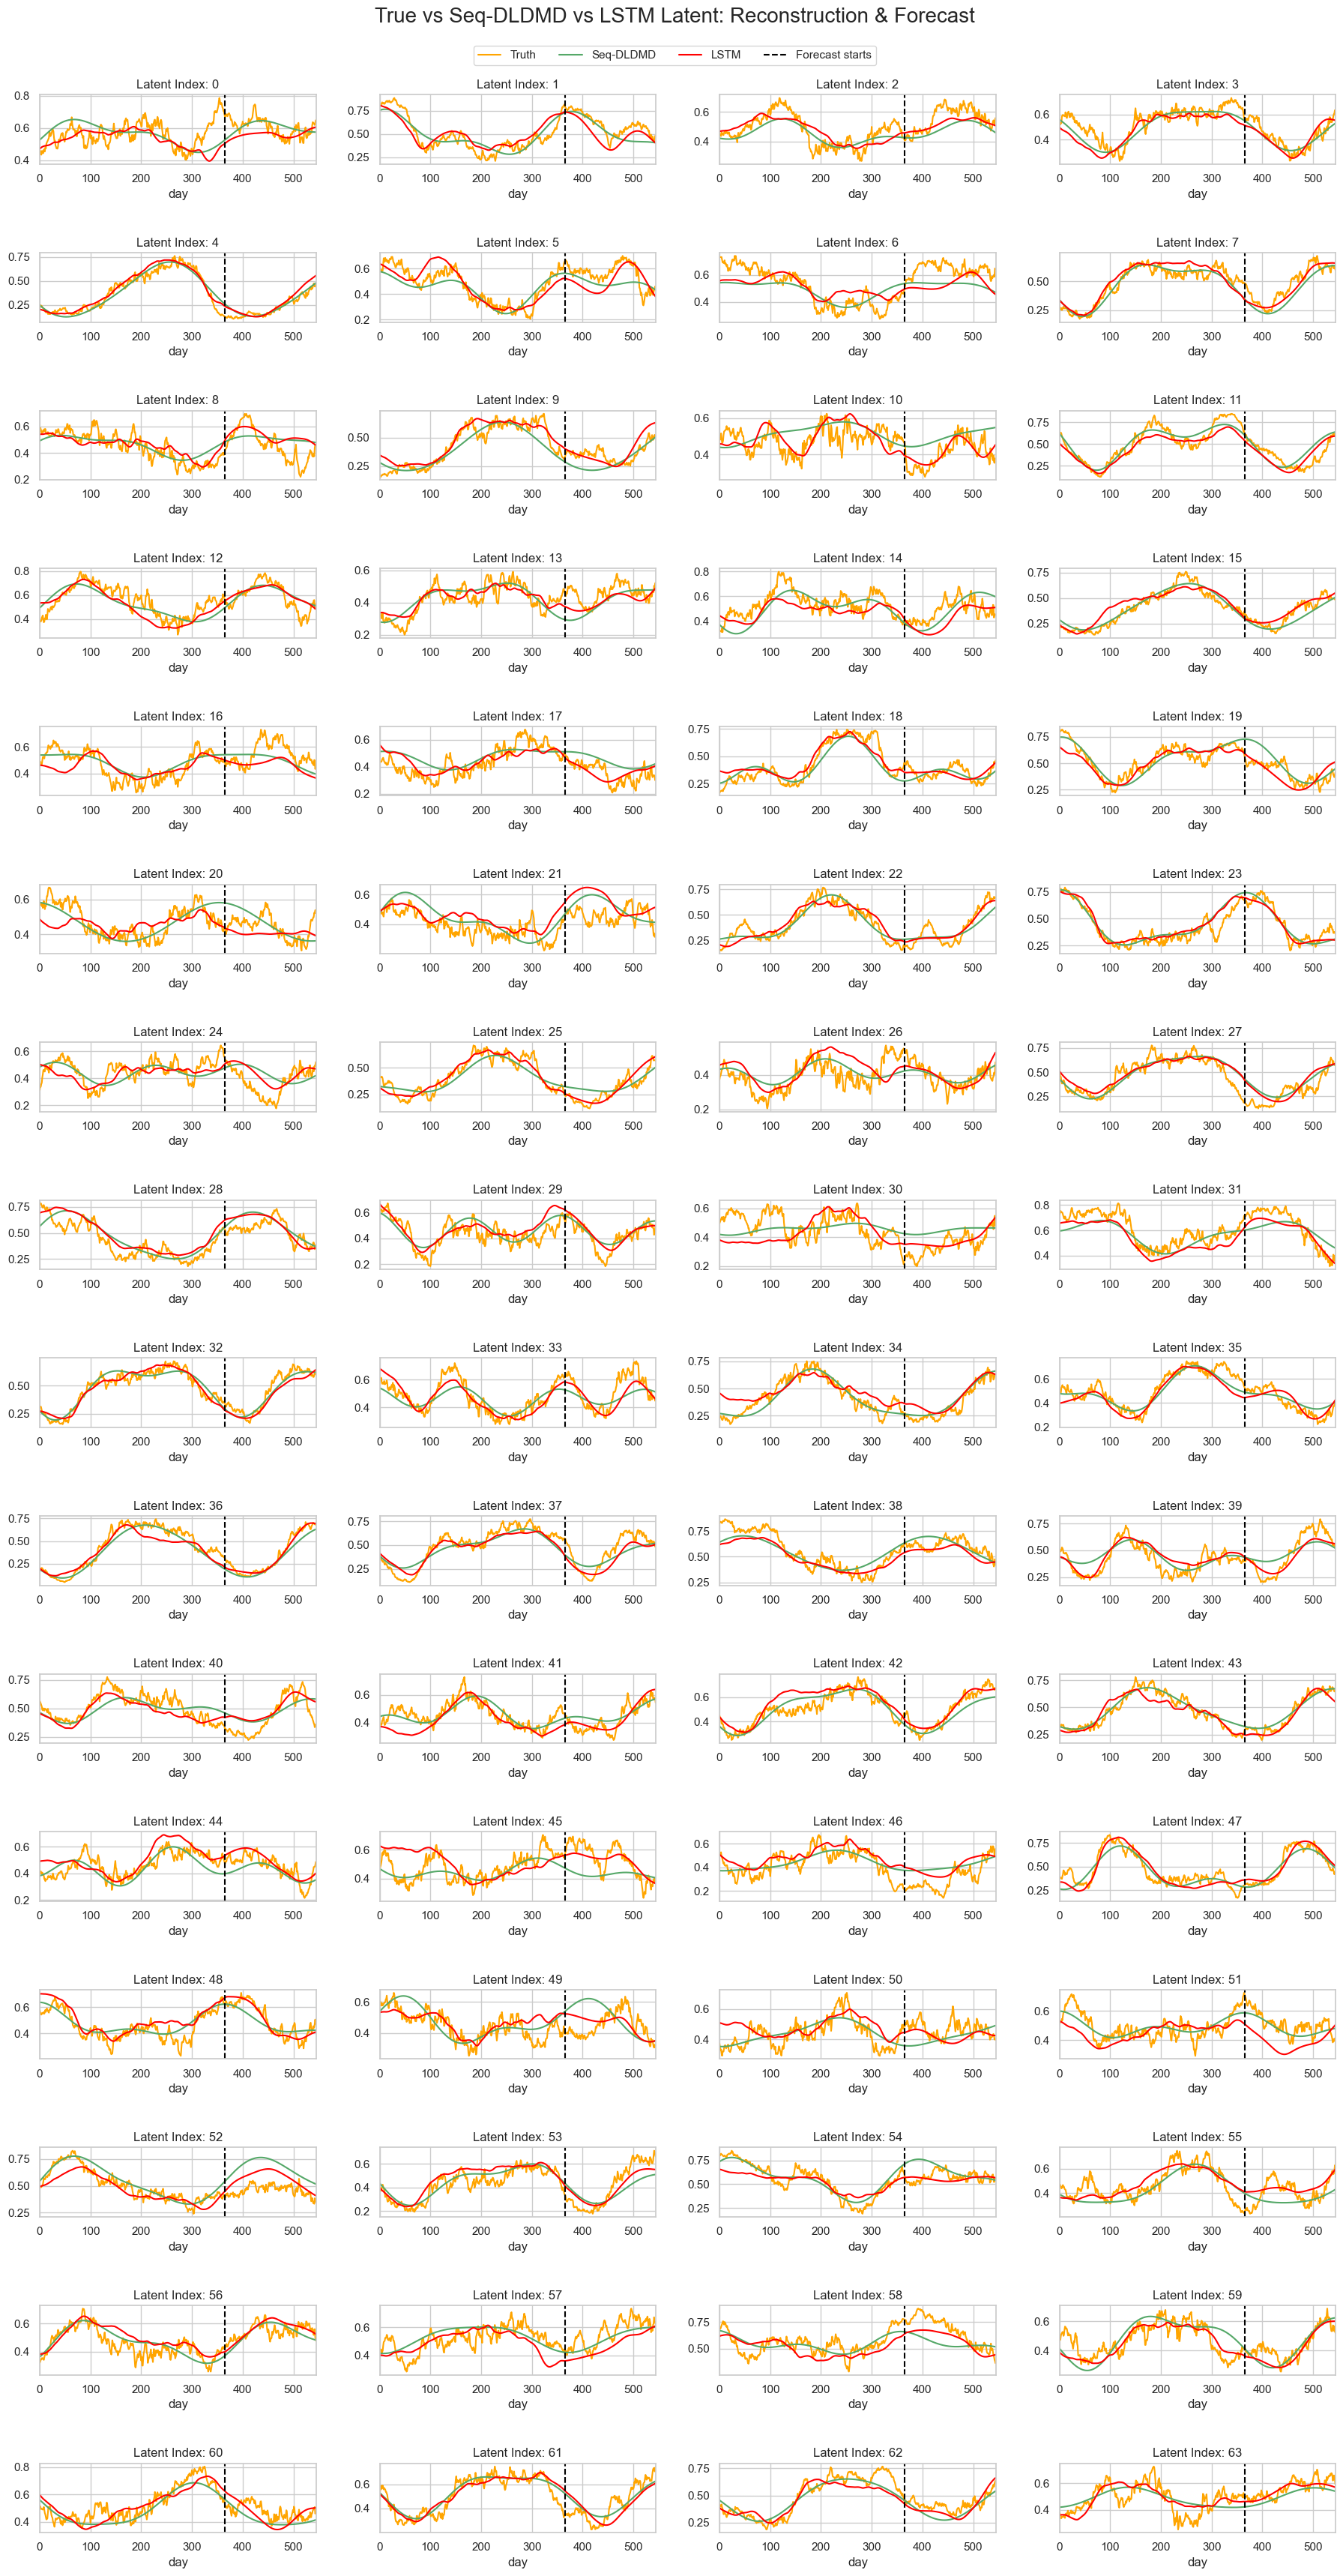

In [78]:
fig, axes = plt.subplots(16, 4, figsize=(18, 34))
axes = axes.flatten()

for i, ax in enumerate(axes):

    dldmd_1 = dldmd_latent[0]
    dmd_pred_1 = np.concatenate((dldmd_1[4],dldmd_1[5][:180]))
    dmd_true_1 = np.concatenate((dldmd_1[2],dldmd_1[3][:180]))

    sns.lineplot(dmd_true_1[data_limit:,i],  ax =ax, color = 'orange', label = "Truth")
    ax1 = sns.lineplot(dmd_pred_1[data_limit:,i],  ax =ax ,color = 'g', label = "Seq-DLDMD" )

    lstm_1 = lstm_latent[0]
    lstm_pred_1 = lstm_1[3]
    ax2 = sns.lineplot(lstm_pred_1[data_limit:,i],  ax =ax,color = 'red', label ="LSTM")
    
    ax.axvline(x = 365, color ='black', linestyle = '--', label = "Forecast starts")
    ax.get_legend().remove()
    
    ax.set_xlim([0 ,365+180])
    ax.title.set_text("Latent Index: {}".format(i))
    ax.set(xlabel='day')


lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]

lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

fig.legend(lines[:4], labels[:4], loc="lower center", ncol=4,bbox_to_anchor=(0.5, 0.985))
fig.suptitle("True vs Seq-DLDMD vs LSTM Latent: Reconstruction & Forecast", size = 20,y = 1.01)

#plt.subplots_adjust(left=1/16.0, right=1-1/16.0, bottom=1/8.0, top=1-1/8.0)
#fig.suptitle("LSTM Climatology vs True latent space: Reconstruction & Forecast", size = 20,y = -1)

#plt.subplots_adjust(bottom=0.1)
plt.tight_layout(h_pad=3, w_pad = 3)
plt.show()

In [14]:

# ax2 = axs[0][0].twinx()
# sns.lineplot(data=melted_dfs[1], x='pred_day', y = 'IIEE',color="r", ax=ax2, label ='IIEE')
# ax2.yaxis.set_major_formatter(formatter_mil)
# ax2.grid(False)
# ax2.set(ylabel='IIEE, km sq')
# ax2.set_ylim([1e6, 3.0e6])

# ##################################

# ax3 = sns.lineplot(melted_dfs[2], x='pred_day', y = 'MAE', label ='_MAE', ax =axs[0][1] )
# ax3.grid(False)
# ax3.set(xlabel='Forecast day')
# ax3.set_ylim([0.016, 0.042])
# ax3.title.set_text(title_list[1])

# ax4 = axs[0][1].twinx()
# sns.lineplot(data=melted_dfs[3], x='pred_day', y = 'IIEE',color="r", ax=ax4, label ='_IIEE')
# ax4.yaxis.set_major_formatter(formatter_mil)
# ax4.grid(False)
# ax4.set(ylabel='IIEE, km sq')
# ax4.set_ylim([1e6, 3.0e6])

# ################################################
# ax5 = sns.lineplot(melted_dfs[4], x='pred_day', y = 'MAE', label ='_MAE', ax =axs[1][0] )
# ax5.grid(False)
# ax5.set(xlabel='Forecast day')
# ax5.set_ylim([0.016, 0.042])
# ax5.title.set_text(title_list[2])

# ax6 = axs[1][0].twinx()
# sns.lineplot(data=melted_dfs[5], x='pred_day', y = 'IIEE',color="r", ax=ax6, label ='_IIEE')
# ax6.yaxis.set_major_formatter(formatter_mil)
# ax6.grid(False)
# ax6.set(ylabel='IIEE, km sq')
# ax6.set_ylim([1e6, 3.0e6])

# ####################################################

# ax7 = sns.lineplot(melted_dfs[6], x='pred_day', y = 'MAE', label ='_MAE', ax =axs[1][1] )
# ax7.grid(False)
# ax7.set(xlabel='Forecast day')
# ax7.set_ylim([0.016, 0.042])
# ax7.title.set_text(title_list[3])


# ax8 = axs[1][1].twinx()
# sns.lineplot(data=melted_dfs[7], x='pred_day', y = 'IIEE',color="r", ax=ax8, label ='_IIEE')
# ax8.yaxis.set_major_formatter(formatter_mil)
# ax8.grid(False)
# ax8.set(ylabel='IIEE, km sq')
# ax8.set_ylim([1e6, 3.0e6])

# #ax8.legend(loc = 'lower right')

# #handles, labels = plt.gca().get_legend_handles_labels()

# lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]

# lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# fig.legend(lines, labels, loc="lower right", ncol=2)

# #fig.subplots_adjust(hspace=0.1)
# fig.suptitle("Sequential DLDMD - SIC forecast error per image", size = 20, y=1)

# axis_list = [ax1,ax2]

# for i in axis_list: i.get_legend().remove()

# #ax8.get_legend().remove()
# #plt.show()
# plt.tight_layout(h_pad=3, w_pad = 3)


In [15]:
# with open(pkl_dir + 'seq_dldmd_pred.pkl', 'wb') as output:
#     pickle.dump(pred_dec.numpy()[:180], output)
#     #del latent_train

In [16]:
#import seaborn as sns

In [17]:
# """plots using  window = 1, history = 2, svd = 5"""

# fig_1, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

# sns.color_palette("crest", as_cmap=True)
# palette = get_hex("Aluterus_scriptus", keep_first_n=5)

# ax_1 = ax1.contourf(X1_[70], cmap=plt.get_cmap('Blues_r'))
# ax1.set_title("Truth")
# ax1.set_ylim(314, 0)
# cbar1 = fig_1.colorbar(ax_1)

# ax_2 = ax2.contourf(pred_dec.numpy()[70], cmap=plt.get_cmap('Blues_r'))
# ax2.set_title("Sequential DLDMD forecast")
# ax2.set_ylim(314, 0)
# cbar2 = fig_1.colorbar(ax_2)

# sns.set(style="darkgrid")

# fig_1.suptitle("Truth vs Sequential DLDMD forecast, 70 days forward")
# plt.show()

In [18]:
# fig_2, (ax3, ax4) = plt.subplots(1,2, figsize=(15,5))

# ax_3 = ax3.contourf(X1_[179], cmap=plt.get_cmap('Blues_r'))
# ax3.set_title("Truth")
# ax3.set_ylim(314, 0)
# cbar3 = fig_2.colorbar(ax_3)

# ax_4 = ax4.contourf(pred_dec.numpy()[179], cmap=plt.get_cmap('Blues_r'))
# ax4.set_title("Sequential DLDMD forecast")
# ax4.set_ylim(314, 0)
# cbar4 = fig_2.colorbar(ax_4)

# sns.set(style="darkgrid")

# fig_2.suptitle("Truth vs Sequential DLDMD forecast, 180 days forward")
# plt.show()

In [19]:
# def melt_frame_lineplot_any(input_mae,metric, qry):
#     temp_df = input_mae.query(qry)

#     temp_df = temp_df[temp_df.columns[1:]].melt(['SVD rank', 'History'], var_name = 'pred_day',value_name = metric )
#     temp_df['pred_day'] = temp_df['pred_day']-2

#     return temp_df

In [20]:
# melted_int_dfs = []
# title_int_list = []

# for i in best_win_his:
#     m,n,o = i
#     input_qry = 'Window == {} & History == {} & `SVD rank` == {}'.format(m,n,o)

#     out_df1 = melt_frame_lineplot_any(dmd_true_integral_df,"True" , input_qry)
#     out_df2 = melt_frame_lineplot_any(dmd_pred_integral_df,"Pred" , input_qry)
#     melted_int_dfs.append(out_df1)
#     melted_int_dfs.append(out_df2)
    
#     if m == 1:
#         temp_title = "{}-years of historical data with SVD rank: {}".format(n,o)
#     else:
#         temp_title = "{}-day moving average window using {}-years of historical data with SVD rank:{}".format(m,n,o)
#     title_int_list.append(temp_title)

In [21]:
# import seaborn as sns

# sns.set(style="whitegrid")
# fig_int, axs_int = plt.subplots(2, 2, figsize=(15, 8))

# ax1_int = sns.lineplot(melted_int_dfs[0], x='pred_day', y = 'True', label ='True', ax =axs_int[0][0], color="b" )
# sns.lineplot(data=melted_int_dfs[1], x='pred_day', y = 'Pred',color="r", ax=axs_int[0][0], label ='Pred')
# ax1_int.grid(False)
# ax1_int.set(xlabel='Forecast day')
# ax1_int.title.set_text(title_int_list[0])
# ax1_int.set_ylim([0.0, 0.25])
# ax1_int.set(ylabel="Total Ice")

# ax2_int = sns.lineplot(melted_int_dfs[2], x='pred_day', y = 'True', label ='_True', ax =axs_int[0][1], color="b" )
# sns.lineplot(data=melted_int_dfs[3], x='pred_day', y = 'Pred',color="r", ax=axs_int[0][1], label ='_Pred')
# ax2_int.grid(False)
# ax2_int.set(xlabel='Forecast day')
# ax2_int.title.set_text(title_int_list[1])
# ax2_int.set_ylim([0.0, 0.25])
# ax2_int.set(ylabel="Total Ice")

# ax3_int = sns.lineplot(melted_int_dfs[4], x='pred_day', y = 'True', label ='_True', ax =axs_int[1][0], color="b" )
# sns.lineplot(data=melted_int_dfs[5], x='pred_day', y = 'Pred',color="r", ax=axs_int[1][0], label ='_Pred')
# ax3_int.grid(False)
# ax3_int.set(xlabel='Forecast day')
# ax3_int.title.set_text(title_int_list[2])
# ax3_int.set_ylim([0.0, 0.25])
# ax3_int.set(ylabel="Total Ice")


# ax4_int = sns.lineplot(melted_int_dfs[6], x='pred_day', y = 'True', label ='_True', ax =axs_int[1][1], color="b" )
# sns.lineplot(data=melted_int_dfs[7], x='pred_day', y = 'Pred',color="r", ax=axs_int[1][1], label ='_Pred')
# ax4_int.grid(False)
# ax4_int.set(xlabel='Forecast day')
# ax4_int.title.set_text(title_int_list[3])
# ax4_int.set_ylim([0.0, 0.25])
# ax4_int.set(ylabel="Total Ice")


# lines_labels = [ax.get_legend_handles_labels() for ax in fig_int.axes]

# lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# fig_int.legend(lines, labels, loc="lower right", ncol=2)

# #fig.subplots_adjust(hspace=0.1)
# fig_int.suptitle("Sequential DLDMD - Total Ice per forecasted day", size = 20, y=1)

# axis_list = [ax1_int]

# for i in axis_list: i.get_legend().remove()

# #ax8.get_legend().remove()
# #plt.show()
# plt.tight_layout(h_pad=3, w_pad = 3)


In [22]:
# melted_latent_dfs = []
# title_latent_list = []

# for i in best_win_his:
#     m,n,o = i
#     #input_qry = 'Window == {} & History == {} & `SVD rank` == {}'.format(m,n,o)
#     for idx, j in enumerate(latent_space_pred):
#         if j[0] == i:
#             melted_latent_dfs.append(j[1])
#             melted_latent_dfs.append(latent_space_true[idx][1])
        
#             if m == 1:
#                 temp_title = "{}-years of historical data with SVD rank: {}".format(n,o)
#             else:
#                 temp_title = "{}-day moving average window using {}-years of historical data with SVD rank:{}".format(m,n,o)
#             title_latent_list.append(temp_title)



In [23]:
# import seaborn as sns


# latent_idx = 0
# sns.set(style="whitegrid")
# fig_lat, axs_lat = plt.subplots(2, 2, figsize=(15, 8), constrained_layout=False)

# axs_lat[0][0].plot(melted_latent_dfs[0][:,latent_idx], label="pred latent idx = 0", color='green')
# axs_lat[0][0].plot(melted_latent_dfs[1][:,latent_idx], label="true latent idx = 0", color='orange')

# # axs_lat[0][0].plot(melted_latent_dfs[0][:,2])
# # axs_lat[0][0].plot(melted_latent_dfs[1][:,2])
# axs_lat[0][0].set_xlim(0, 180)
# axs_lat[0][0].set_ylim(0.4, 0.8)
# axs_lat[0][0].set_xlabel('Forecast day')
# axs_lat[0][0].set_ylabel('Latent value')
# axs_lat[0][0].set_title(title_latent_list[0])

# axs_lat[0][1].plot(melted_latent_dfs[2][:,latent_idx], label="_pred latent idx = 0",color='green')
# axs_lat[0][1].plot(melted_latent_dfs[3][:,latent_idx], label="_true latent idx = 0",color='orange')
# axs_lat[0][1].set_xlim(0, 180)
# axs_lat[0][1].set_ylim(0.4, 0.8)
# axs_lat[0][1].set_xlabel('Forecast day')
# axs_lat[0][1].set_ylabel('Latent value')
# axs_lat[0][1].set_title(title_latent_list[1])

# axs_lat[1][0].plot(melted_latent_dfs[4][:,latent_idx], label="_pred latent idx = 0",color='green')
# axs_lat[1][0].plot(melted_latent_dfs[5][:,latent_idx], label="_true latent idx = 0",color='orange')
# axs_lat[1][0].set_xlim(0, 180)
# axs_lat[1][0].set_ylim(0.4, 0.8)
# axs_lat[1][0].set_xlabel('Forecast day')
# axs_lat[1][0].set_ylabel('Latent value')
# axs_lat[1][0].set_title(title_latent_list[2])

# axs_lat[1][1].plot(melted_latent_dfs[6][:,latent_idx], label="_pred latent idx = 0",color='green')
# axs_lat[1][1].plot(melted_latent_dfs[7][:,latent_idx], label="_true latent idx = 0",color='orange')
# axs_lat[1][1].set_xlim(0, 180)
# axs_lat[1][1].set_ylim(0.4, 0.8)
# axs_lat[1][1].set_xlabel('Forecast day')
# axs_lat[1][1].set_ylabel('Latent value')
# axs_lat[1][1].set_title(title_latent_list[3])

# fig_lat.suptitle("Sequential DLDMD - latent space", size = 20, y=1)

# lines_labels = [ax.get_legend_handles_labels() for ax in fig_lat.axes]

# lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# fig_lat.legend(lines, labels, loc="lower center", ncol=2)

# plt.tight_layout(h_pad=3, w_pad = 3)

In [24]:
# with open(r'../outputs/seq_dmd_stats/all_seqdmd_stats_' + time.strftime("%Y%m%d"), 'wb') as output:
#      pickle.dump([dmd_avg_stat_df,dmd_MSE_df, dmd_MAE_df, dmd_IIEE_df,dmd_latent_recon_df, dmd_latent_fwd_df], output)

In [25]:
# with open(r'../outputs/seq_dmd_stats/all_seqdmd_stats_20240815', 'rb') as f:
#     loaded_df = pickle.load(f)

# dmd_avg_stat_df,dmd_MSE_df, dmd_MAE_df, dmd_IIEE_df,dmd_latent_recon_df, dmd_latent_fwd_df = loaded_df

In [26]:
# dmd_avg_stat_df.to_csv(stats_dir + "Seq_DMD_avg_stat_df.csv")

# dmd_latent_recon_df.to_csv(stats_dir + "Seq_DMD_latentrecon_stat_df.csv")
# dmd_latent_fwd_df.to_csv(stats_dir + "Seq_DMD_avg_latentfwd_df.csv")

In [27]:
# import seaborn as sns

# def query_boxplot(qry, metric, input_df, plt_title,shade = "BluetoGray_8", yxformat = None):
    
#     temp_df = input_df.query(qry)
#     melt_df = temp_df[temp_df.columns[1:]].melt(['SVD rank', 'History'], var_name = 'pred_day',value_name = metric )

#     fig, axs = plt.subplots(1, 1, figsize=(16, 7))

#     #palette = get_hex("Bmlunge")
#     sns.set_theme()
#     palette = get_hex(shade, keep_first_n=8)
#     sns.set_style("darkgrid")
#     ax_sns = sns.boxplot(data= melt_df, x = 'SVD rank', y = metric , hue = "History" , ax = axs, palette= palette)
#     #ax_sns.set_title("Distribution of IIEE  - Forecasted SIC images")
#     ax_sns.set_title(plt_title)

#     if yxformat is not None:
#         ax_sns.yaxis.set_major_formatter(yxformat)

#     l = ax_sns.legend(title= 'History:', bbox_to_anchor=(0.2, -0.07), ncol = 5, loc = 'center', frameon=False)
#     #sns.move_legend(ax_sns, "center", bbox_to_anchor=(0.5, -0.15), ncol = 5, frameon=False)
#     l.get_title().set_position((-190, -21))

#     #sns.set_style()
#     plt.plot()

In [28]:
# win = 1
# svd_u = 11
# svd_l = 2

# input_qry = 'Window == {} & History in (2,5,7,10) & `SVD rank` < {} & `SVD rank` > {}'.format(win, svd_u, svd_l)

# query_boxplot(input_qry, "MAE", dmd_MAE_df,"Distribution of MAE - Forecasted SIC images" )
# query_boxplot(input_qry, "IIEE", dmd_IIEE_df,"Distribution of Avg IIEE - Forecasted SIC images", yxformat = formatter)

# for i in [5,10,20]:
#     input_qry = 'Window == {} & History in (2,5,7,10) & `SVD rank` < {} & `SVD rank` > {}'.format(i, svd_u, svd_l)
#     query_boxplot(input_qry, "MAE", dmd_MAE_df,"Distribution of MAE - Forecasted SIC images, {}-day Moving averge".format(i) )
#     query_boxplot(input_qry, "IIEE", dmd_IIEE_df,"Distribution of Avg IIEE - Forecasted SIC images, {}-day Moving averge".format(i), yxformat = formatter)